In [9]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/archive.zip"
extract_to = "/content/afhq"

# 解压前先删除旧目录（如果有）
if os.path.exists(extract_to):
    import shutil
    shutil.rmtree(extract_to)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ 解压完成")

# 列出解压后的目录
for root, dirs, files in os.walk(extract_to):
    print(f"📂 {root} - 子目录 {dirs[:3]}, 文件数 {len(files)}")
    break  # 只显示顶层


✅ 解压完成
📂 /content/afhq - 子目录 ['dog', 'cat', 'wild'], 文件数 0


In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_afhq_binary_dataset(base_path, img_size=(32, 32)):
    images = []
    labels = []

    label_map = {"cat": 0, "dog": 1}  # 二分类任务

    for label_name in ["cat", "dog"]:
        folder = os.path.join(base_path, label_name)
        for fname in os.listdir(folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(folder, fname)
                img = cv2.imread(path)
                if img is None:
                    continue
                img = cv2.resize(img, img_size)
                img = img / 255.0
                images.append(img)
                labels.append(label_map[label_name])

    return np.array(images), np.array(labels)

# 路径设定
afhq_path = "/content/afhq"
x, y = load_afhq_binary_dataset(afhq_path)

print("✅ 图像 shape：", x.shape)
print("✅ 标签 shape：", y.shape)
print("✅ 类别分布：cat =", np.sum(y == 0), ", dog =", np.sum(y == 1))


✅ 图像 shape： (10727, 32, 32, 3)
✅ 标签 shape： (10727,)
✅ 类别分布：cat = 5558 , dog = 5169


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ 训练集：", x_train.shape, y_train.shape)
print("✅ 测试集：", x_test.shape, y_test.shape)


✅ 训练集： (8581, 32, 32, 3) (8581,)
✅ 测试集： (2146, 32, 32, 3) (2146,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.7068 - loss: 0.5345 - val_accuracy: 0.9222 - val_loss: 0.2143
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.9384 - loss: 0.1664 - val_accuracy: 0.9543 - val_loss: 0.1276
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9594 - loss: 0.1107 - val_accuracy: 0.9562 - val_loss: 0.1095
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 0.9685 - loss: 0.0797 - val_accuracy: 0.9711 - val_loss: 0.0765
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9841 - loss: 0.0472 - val_accuracy: 0.9776 - val_loss: 0.0609
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9872 - loss: 0.0347 - val_accuracy: 0.9800 - val_loss: 0.0570
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9931 - loss: 0.0258 - val_accuracy: 0.9818 - val_loss: 0.0505
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.9932 - loss: 0.0197 - 

<ipython-input-12-819c10f15093>:43: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.savefig("afhq_model/training_curve.png")
<ipython-input-12-819c10f15093>:43: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.savefig("afhq_model/training_curve.png")
<ipython-input-12-819c10f15093>:43: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.savefig("afhq_model/training_curve.png")
<ipython-input-12-819c10f15093>:43: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.savefig("afhq_model/training_curve.png")
<ipython-input-12-819c10f15093>:43: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.savefig("afhq_model/training_curve.png")
<ipython-input-12-819c10f15093>:43: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu San

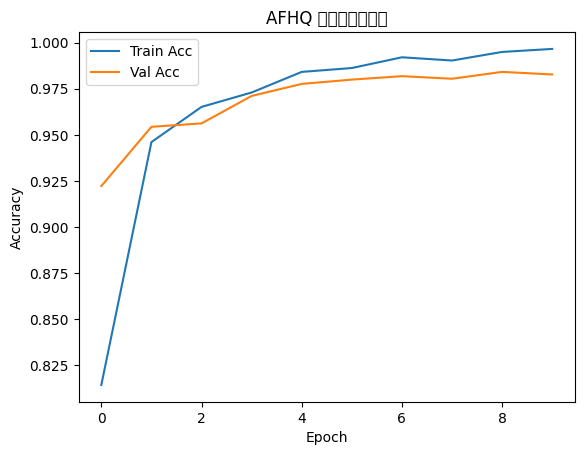

In [12]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os

# 建立 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 二分类输出
])

# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 创建输出资料夹
os.makedirs("afhq_model", exist_ok=True)

# 训练模型
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# 保存模型
model.save("afhq_model/afhq_cnn_model.h5")

# 绘图
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('AFHQ 模型训练准确率')
plt.legend()
plt.savefig("afhq_model/training_curve.png")
plt.show()


68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
✅ 分类报告：
              precision    recall  f1-score   support

         cat       0.98      0.99      0.98      1112
         dog       0.99      0.98      0.98      1034

    accuracy                           0.98      2146
   macro avg       0.98      0.98      0.98      2146
weighted avg       0.98      0.98      0.98      2146



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30697 (\N{CJK UNIFIED IDEOGRAPH-77E9}) missing from font(s) DejaVu Sans.
  fig.canvas

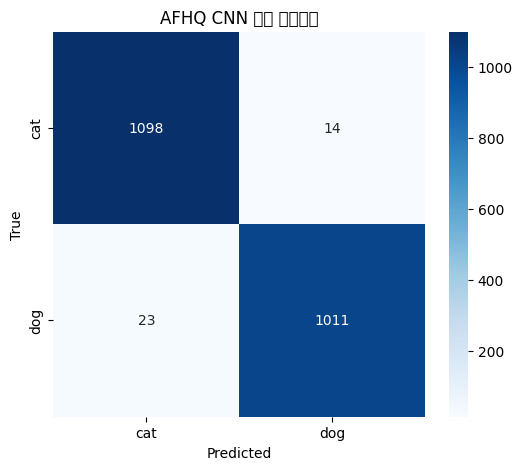

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 预测
y_pred_probs = model.predict(x_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()  # 概率转为 0/1 标签

# 分类报告
print("✅ 分类报告：")
print(classification_report(y_test, y_pred_classes, target_names=["cat", "dog"]))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["cat", "dog"], yticklabels=["cat", "dog"])
plt.title("AFHQ CNN 模型 混淆矩阵")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [14]:
def make_gradcam_heatmap(img_array, model):
    # 自动找最后一层卷积层
    last_conv_layer = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer = layer.name
            break

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # binary 分类只有一个输出

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [17]:
from tensorflow.keras import Input, Model, layers

inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="target_conv")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)


✅ 正确预测图示：


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_36']]
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


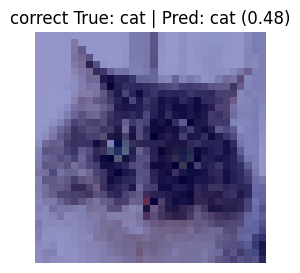

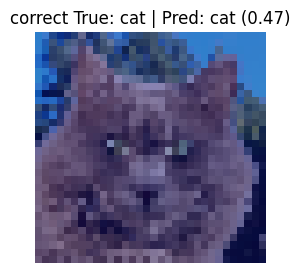

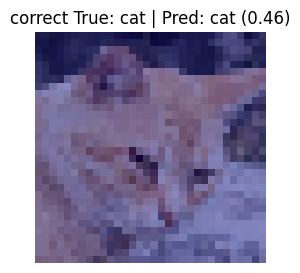

❌ 错误预测图示：


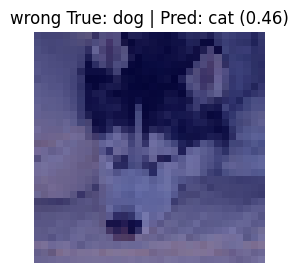

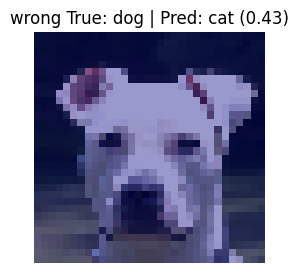

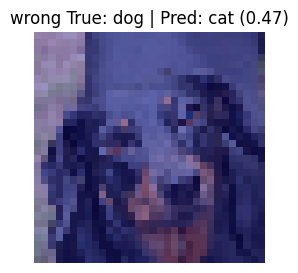

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# ✅ 自动找模型中最后一层卷积
def get_last_conv_layer_name(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("❌ 没有找到卷积层")

# ✅ GradCAM 热力图函数
def make_gradcam_heatmap(img_array, model):
    last_conv_layer_name = get_last_conv_layer_name(model)
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # 二分类，输出维度是 (batch, 1)

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# ✅ 创建输出目录
os.makedirs("afhq_gradcam_output", exist_ok=True)

# ✅ 单张可视化函数
def show_gradcam(idx, title_prefix=""):
    img = x_test[idx]
    img_input = np.expand_dims(img, axis=0)

    pred_prob = model.predict(img_input, verbose=0)[0][0]
    pred_class = int(pred_prob > 0.5)
    pred_label = "dog" if pred_class == 1 else "cat"
    true_label = "dog" if y_test[idx] == 1 else "cat"

    heatmap = make_gradcam_heatmap(img_input, model)
    img_rgb = np.uint8(255 * img)
    heatmap_resized = cv2.resize(heatmap, (32, 32))
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(3, 3))
    plt.title(f"{title_prefix} True: {true_label} | Pred: {pred_label} ({pred_prob:.2f})")
    plt.imshow(superimposed_img[..., ::-1])
    plt.axis("off")
    plt.show()

    save_path = f"afhq_gradcam_output/{title_prefix}_true_{true_label}_pred_{pred_label}_{idx}.png"
    cv2.imwrite(save_path, superimposed_img[..., ::-1])

# ✅ 取得正确/错误预测索引
y_preds = (model.predict(x_test, verbose=0) > 0.5).astype(int).flatten()
correct_indexes = np.where(y_preds == y_test)[0]
wrong_indexes = np.where(y_preds != y_test)[0]

# ✅ 批次显示
print("✅ 正确预测图示：")
for idx in correct_indexes[:3]:
    show_gradcam(idx, title_prefix="correct")

print("❌ 错误预测图示：")
for idx in wrong_indexes[:3]:
    show_gradcam(idx, title_prefix="wrong")


In [19]:
import zipfile

data_zip_path = "/content/drive/MyDrive/data.zip"
extract_to = "/content/mydata"

with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ 解压完成，路径：{extract_to}")

✅ 解压完成，路径：/content/mydata


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


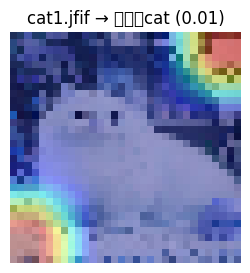

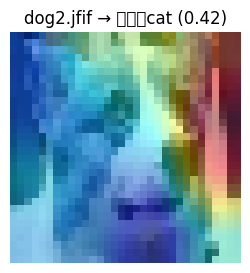

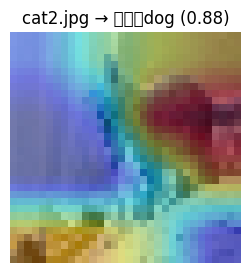

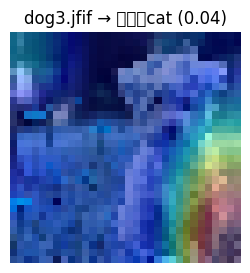

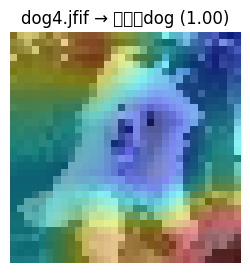

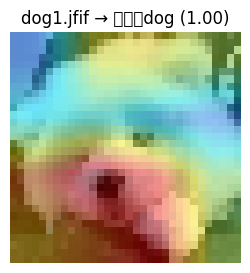

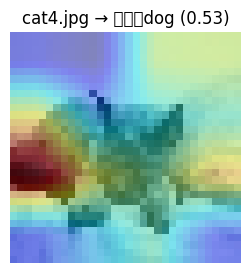

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras import Input, Model, layers
import tensorflow as tf

# ✅ 类别名称（AFHQ 是二分类）
class_names = ['cat', 'dog']

# ✅ 重新搭建和训练时一致的模型结构（用于 GradCAM）
inputs = Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
target_conv_output = layers.Conv2D(64, (3, 3), activation='relu', name="target_conv")(x)
x = layers.Flatten()(target_conv_output)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

grad_model = Model(inputs=inputs, outputs=[target_conv_output, outputs])

# ✅ 加载模型参数（确保模型路径正确）
model = load_model("/content/afhq_model/afhq_cnn_model.h5")
grad_model.set_weights(model.get_weights())

# ✅ GradCAM 核心函数
def make_gradcam_heatmap(img_array, model):
    with tf.GradientTape() as tape:
        conv_outputs, predictions = model(img_array)
        loss = predictions[:, 0]  # 二分类输出，只有一个神经元

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# ✅ 图片资料夹
image_folder = "/content/mydata/data"
os.makedirs("afhq_data_test_output", exist_ok=True)

# ✅ 批次处理每张图片
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.jfif')):
        img_path = os.path.join(image_folder, filename)

        # 预处理
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img) / 255.0
        img_input = np.expand_dims(img_array, axis=0)

        # 模型预测
        pred = model.predict(img_input, verbose=0)[0][0]
        pred_class = int(pred > 0.5)
        pred_label = class_names[pred_class]

        # GradCAM 热图
        heatmap = make_gradcam_heatmap(img_input, grad_model)
        img_rgb = np.uint8(255 * img_array)
        heatmap_resized = cv2.resize(heatmap, (32, 32))
        heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_color, 0.4, 0)

        # 显示
        plt.figure(figsize=(3, 3))
        plt.imshow(superimposed_img[..., ::-1])
        plt.title(f"{filename} → 預測：{pred_label} ({pred:.2f})")
        plt.axis('off')
        plt.show()

        # 可选：保存图像
        save_path = f"afhq_data_test_output/{filename}_pred_{pred_label}.png"
        cv2.imwrite(save_path, superimposed_img[..., ::-1])


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


✅ 分类报告（cat=0, dog=1）：
              precision    recall  f1-score   support

         cat       0.59      0.52      0.55      6000
         dog       0.57      0.64      0.60      6000

    accuracy                           0.58     12000
   macro avg       0.58      0.58      0.58     12000
weighted avg       0.58      0.58      0.58     12000



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29483 (\N{CJK UNIFIED IDEOGRAPH-732B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29399 (\N{CJK UNIFIED IDEOGRAPH-72D7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas

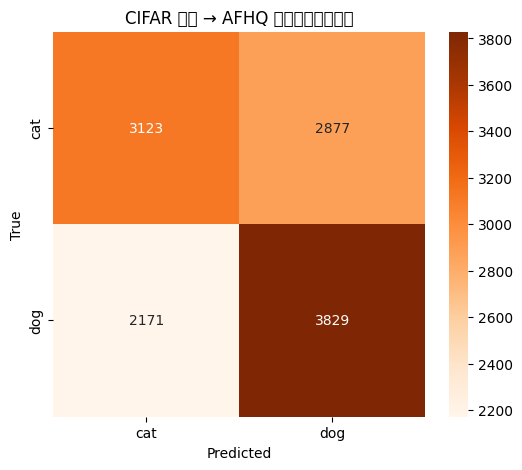

In [24]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 载入 CIFAR-10 数据，只保留 cat=3 和 dog=5
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_all = np.concatenate([x_train, x_test])
y_all = np.concatenate([y_train, y_test]).flatten()

# ✅ 过滤出 cat=3 和 dog=5
selected_indexes = np.where((y_all == 3) | (y_all == 5))[0]
x_selected = x_all[selected_indexes]
y_selected = y_all[selected_indexes]

# ✅ 预处理
x_selected = x_selected.astype("float32") / 255.0

# ✅ 将标签转为 0（cat）和 1（dog）以符合 AFHQ 模型的 sigmoid 输出
y_binary = (y_selected == 5).astype(int)

# ✅ 加载你训练的 AFHQ 模型
model = load_model("/content/afhq_model/afhq_cnn_model.h5")

# ✅ 模型预测
y_pred_probs = model.predict(x_selected, verbose=0).flatten()
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# ✅ 分类报告
print("✅ 分类报告（cat=0, dog=1）：")
print(classification_report(y_binary, y_pred_classes, target_names=['cat', 'dog']))

# ✅ 混淆矩阵
cm = confusion_matrix(y_binary, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['cat', 'dog'], yticklabels=['cat', 'dog'])
plt.title("CIFAR 猫狗 → AFHQ 模型预测混淆矩阵")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
